<a href="https://colab.research.google.com/github/BrettCutler/LookingGlass/blob/main/_theophite's_Awful_Hacked_Looking_Glass_v1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [ ]:
#@title
import multiprocessing
import torch
import os
from psutil import virtual_memory
from pathlib import Path

ram_gb = round(virtual_memory().total / 1024**3, 1)

print('CPU:', multiprocessing.cpu_count())
print('RAM GB:', ram_gb)
print("PyTorch version:", torch.__version__)
print("CUDA version:", torch.version.cuda)
print("cuDNN version:", torch.backends.cudnn.version())
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device:", device.type)

!nvidia-smi

from pynvml import *
nvmlInit()
h = nvmlDeviceGetHandleByIndex(0)
info = nvmlDeviceGetMemoryInfo(h)
if info.total>10252636672:
  print('Everything is ok, you can begin')
else:
  print('We dont recomend to begin, you gonna get out of memory')

CPU: 12
RAM GB: 83.5
PyTorch version: 1.10.0+cu111
CUDA version: 11.1
cuDNN version: 8005
device: cuda
Sun Apr 24 05:27:32 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    43W / 400W |      3MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+---------

In [ ]:
#@title
!pip3 install translatepy
from translatepy import Translator, Language
ts = Translator()
!pip install -U deep-translator
from deep_translator import DeeplTranslator, GoogleTranslator
from pathlib import Path
import csv
import logging
import requests

#swinir setup
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
%config InlineBackend.rc = {'figure.figsize': (10.0, 10.0)}

!git clone -qq https://github.com/Lin-Sinorodin/SwinIR_wrapper.git
!pip install -qq timm
from SwinIR_wrapper.SwinIR_wrapper import SwinIR_SR

import cv2
import urllib.request
import matplotlib.pyplot as plt
import numpy
#end swinir setup

     |████████████████████████████████| 814 kB 5.1 MB/s 
     |████████████████████████████████| 79 kB 10.8 MB/s 
     |████████████████████████████████| 58 kB 7.4 MB/s 
  Created wheel for safeIO: filename=safeIO-1.2-py3-none-any.whl size=6747 sha256=8d38f9f31d66f75df609d88aeebe3d68c49c145d7af6804be8b5b4362f4182c0
  Stored in directory: /root/.cache/pip/wheels/18/d7/5e/94b4ff1a846e09f8b4d6f8348c15d5cea7dd951ca04dc4433b
Successfully built safeIO
     |████████████████████████████████| 128 kB 7.7 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


     |████████████████████████████████| 431 kB 5.1 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title
#!pip install rudalle==0.0.1rc4
!git clone https://github.com/neverix/ru-dalle
!pip3 install transformers
!pip3 install omegaconf
!pip3 install einops
!pip3 install taming-transformers
import torch
!mv -f ru-dalle/* ru-dalle/.git .
!rm -rf ru-dalle
!git checkout better-caching
!pip install -e .
!pip install ruclip
device = torch.device('cuda')

# Import model
from rudalle.pipelines import generate_images, show, super_resolution, cherry_pick_by_ruclip
from rudalle import get_rudalle_model, get_tokenizer, get_vae, get_realesrgan
from rudalle.utils import seed_everything
from ruclip import load as get_ruclip

model = get_rudalle_model('Malevich', pretrained=True, fp16=True, device=device)
vae = get_vae(dwt=True).to('cuda')
tokenizer = get_tokenizer()

Cloning into 'ru-dalle'...
remote: Enumerating objects: 665, done.
remote: Counting objects: 100% (335/335), done.
remote: Compressing objects: 100% (143/143), done.
remote: Total 665 (delta 272), reused 192 (delta 192), pack-reused 330
Receiving objects: 100% (665/665), 20.17 MiB | 50.37 MiB/s, done.
Resolving deltas: 100% (403/403), done.
     |████████████████████████████████| 4.0 MB 5.0 MB/s 
     |████████████████████████████████| 77 kB 7.8 MB/s 
     |████████████████████████████████| 895 kB 74.3 MB/s 
     |████████████████████████████████| 596 kB 80.5 MB/s 
     |████████████████████████████████| 6.6 MB 58.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 74 kB 2.5 MB/s 
     |████████████████████████████████| 112 kB 10.7 MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=14123

     |████████████████████████████████| 45 kB 2.0 MB/s 
     |████████████████████████████████| 582 kB 8.8 MB/s 
     |████████████████████████████████| 136 kB 66.1 MB/s 
     |████████████████████████████████| 408 kB 63.2 MB/s 
     |████████████████████████████████| 1.1 MB 84.9 MB/s 
     |████████████████████████████████| 271 kB 86.0 MB/s 
     |████████████████████████████████| 94 kB 4.8 MB/s 
     |████████████████████████████████| 144 kB 71.7 MB/s 
D	.coveragerc
D	.gitignore
D	.gitlab-ci.yml
D	.pre-commit-config.yaml
Branch 'better-caching' set up to track remote branch 'better-caching' from 'origin'.
Switched to a new branch 'better-caching'
Obtaining file:///content
     |████████████████████████████████| 2.8 MB 5.1 MB/s 
     |████████████████████████████████| 1.7 MB 71.4 MB/s 
     |████████████████████████████████| 4.4 MB 71.5 MB/s 
     |████████████████████████████████| 66 kB 6.4 MB/s 
     |████████████████████████████████| 60.3 MB 1.2 MB/s 
     |████████████████████████

     |████████████████████████████████| 61 kB 588 kB/s 
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.5.1
    Uninstalling huggingface-hub-0.5.1:
      Successfully uninstalled huggingface-hub-0.5.1


Downloading:   0%|          | 0.00/2.62G [00:00<?, ?B/s]

◼️ Malevich is 1.3 billion params model from the family GPT3-like, that uses Russian language and text+image multi-modality.
Working with z of shape (1, 256, 32, 32) = 262144 dimensions.


Downloading:   0%|          | 0.00/276M [00:00<?, ?B/s]

vae --> ready


Downloading:   0%|          | 0.00/224k [00:00<?, ?B/s]

tokenizer --> ready


## Parameters

In [ ]:
import glob
!rm -rf crops/*
#@markdown # **PUT YOUR FILENAME HERE**
#@markdown Just put the file name here after uploading it to your file structure and it'll handle the rest.

#@markdown If you want to train on multiple files, put a file glob here (like image* for image1.jpg, image2.jpg...). To grab all images in a folder, use `[FOLDER'S NAME]/*`

file_selector_glob = "/content/drive/MyDrive/onemodel/*"  # @param {type:"string"}
input_files = glob.glob(file_selector_glob, recursive=True)
for i in input_files:
  if "_" in i:
    raise ValueError("Please remove all underscores (the _ character) from your files before proceeding!")


print("Input files:", input_files)
if len(input_files) == 0:
  print("Your input files are empty! This will error out - make sure your file_selector_glob is formatted correctly!")

#@markdown <br></br>
#@markdown # Finetuning Parameters
#@markdown The amount of epochs that training occurs for. Turn down if the images are too similar to the base image. Turn up if they're too different. Use this for fine adjustments.
epoch_amt =   400# @param {type:"number"}
#@markdown Universe similarity determines how close to the original images you will receive. Higher similarity produces images that try to stick closely to the original. Lower similarity produces images that use the original more as inspiration. **If you are getting spooky Russian AI ghosts, try turning your similarity higher or training for longer.** 
universe_similarity = "Medium"  # @param ["Ultra-High","High", "Medium", "Low","Ultra-Low"]
#@markdown Advanced users can manually set learning rate (the parameter that universe similarity controls). If you don't know what "learning rate" means, leave this at -1, which disables manual input.
learning_rate =  1.5e-6# @param {type:"number"}
if learning_rate == -1:
  if universe_similarity == "High":
      learning_rate = 1e-4
  elif universe_similarity == "Medium":
      learning_rate = 2e-5
  elif universe_similarity == "Low":
      learning_rate = 1e-5
  elif universe_similarity == "Ultra-Low":
      learning_rate = 1e-6
  elif universe_similarity == "Ultra-High":
      learning_rate = 2e-4
  else:
      learning_rate = 1e-5
#@markdown <br></br>
#@markdown # Captioning Parameters
#@markdown Input text can influence the end results, so you have the option to change it. **Input text is automatically translated from any language to Russian.**
input_text = ""  # @param {type:"string"}
if input_text != "":
  if len(input_text) < 10:
    raise ValueError("Your input text is too short. Please make it longer!")
  if len(input_text) > 100:
    raise ValueError("Your input text is too long. Please make it shorter!")
if input_text == "":
  input_text = "\u0420\u0438\u0447\u0430\u0440\u0434 \u0414. \u0414\u0436\u0435\u0439\u043C\u0441"
else:
  input_lang = ts.language(input_text).result.alpha2
  if input_lang != 'ru':
    if deepl_api_key != "":
      input_text = DeeplTranslator(api_key=deepl_api_key, source=input_lang, target='ru', use_free_api=True).translate(input_text) 
    else:
      input_text = ts.translate(input_text, "ru").result

#@markdown Enabling `use_filename` will cause your input text to be overwritten by the filenames of your pictures, translated into Russian. For example, a file named "picture of a boy.png" will be captioned "картина мальчика".
use_filename = True  #@param {type: "boolean"}

#@markdown This governs how often the model will actually be saved.

class Args():
    def __init__(self):
        self.text_seq_length = model.get_param('text_seq_length')
        self.total_seq_length = model.get_param('total_seq_length')
        self.epochs = epoch_amt
        self.save_dir = 'checkpoints'
        self.model_name = 'lookingglass'
        self.save_every = 10000 # @param {type:"number"}
        self.prefix_length = 10
        self.bs = 1
        self.clip = 0.24
        self.lr = learning_rate
        self.warmup_steps = 50
        self.wandb = False

torch_args = Args()
if not os.path.exists(torch_args.save_dir):
    os.makedirs(torch_args.save_dir)

#@markdown <br><br>
#@markdown #Output Resizing
#@markdown If you'd like to change the shape or size of the output from its default 256x256 set "resize" to true.<br>Note that this is **much slower**.
do_resize = False  # @param {type:"boolean"}
#if do_resize:
#    low_mem = True
width =   512# @param {type:"number"}
height =   240# @param {type:"number"}
token_width = round(width / 8)
token_height = round(height / 8)

#@markdown <br><br>
#@markdown #Stretchsizing
#@markdown A more crude form of image resizing that squishes your initial image down to 256x256, and then expands the output images back to your original image's aspect ratio. May result in artifacts, but runs much faster than Output Resizing.
#@markdown <br>CURRENTLY INCOMPATIBLE WITH OUTPUT RESIZING. I WILL FIX THIS EVENTUALLY I'M JUST LAZY.
do_stretchsize = False  # @param {type:"boolean"}

ss_size_parent = input_files[0]
if do_stretchsize:
    ss_realesrgan = get_realesrgan("x2", device=device)

import re
original_folder = re.sub(r'[/*?]', '-', file_selector_glob)
print("Identifier", original_folder)


Input files: ['/content/drive/MyDrive/onemodel/rangar house with leather hanging.png', '/content/drive/MyDrive/onemodel/illustration of astal with furry crest and yellow cat eyes.png', '/content/drive/MyDrive/onemodel/astal commoner with blue hair and scarf.png', '/content/drive/MyDrive/onemodel/astronaut armor with broken opaque helmet and mysterious smoke.png', '/content/drive/MyDrive/onemodel/mysterious angel with smoking head wearing trenchcoat and gold ornament on right lapel.png', "/content/drive/MyDrive/onemodel/abstract art of soldier with rifle and mask at night sultan's court.png", '/content/drive/MyDrive/onemodel/angelic boy with mysterious light in his head.png', '/content/drive/MyDrive/onemodel/albino woman in red robe and striped hood with spires.png', '/content/drive/MyDrive/onemodel/ancient concrete pyramid with multiple levels and sphere on top.png', '/content/drive/MyDrive/onemodel/astronaut in armor with arm extended to the left.png', '/content/drive/MyDrive/onemodel

In [ ]:
#@title Gif splitting
import PIL
from PIL import Image
import os

!rm -rf gif_frames
!mkdir gif_frames

to_remove = []
to_add = []

for image_path in input_files:
  __, image_name = os.path.split(image_path)
  if image_name.endswith('.gif'):
    im = Image.open(image_path)
    for frame in range(0, im.n_frames):
      gif_frames_path = os.path.join("gif_frames", image_name + str(frame) + ".png")
      im.seek(frame)
      im.save(gif_frames_path)
      to_add.append(gif_frames_path)
    to_remove.append(image_path)

input_files = [image_path for image_path in input_files if image_path not in to_remove]
input_files.extend(to_add)

In [ ]:
#@title Stretchsize processing

!rm -rf stretchsize
!mkdir stretchsize

original_file = ''
st_width = 256
st_height = 256
if do_stretchsize:
  new_input_files = []
  #@markdown `do_stretchsize` disables `do_resize`
  do_resize = False
  #@markdown `do_stretchsize` always does `skip_gt`
  skip_gt = True

  for image_path in input_files:
    __, image_name = os.path.split(image_path)
    im = Image.open(image_path)
    st_width, st_height = im.size
    if st_width > st_height:
      im1 = im.resize((st_width, st_width))
    else:
      im1 = im.resize((st_height, st_height))
    stretched_path = os.path.join("stretchsize", image_name)
    im1.save(stretched_path)
    new_input_files.append(stretched_path)
  print("Input files:", new_input_files)
  input_files = new_input_files
  try:
    im = Image.open(ss_size_parent)
    st_width, st_height = im.size
  except:
    st_width, st_height = 256

## Advanced Options

In [ ]:
#@title Image Augmentation Code from [@Grump_AI](https://twitter.com/Grump_AI).
import random
import math
from PIL import Image

def all_crops(image_path, distance_between_crops, out_path):
  """
  Saves all square-sized crops starting from the leftmost or topmost edge of the image.
  :param str image_path: Path to the image to crop
  :param int distance_between_crops: Distance between each unique crop in pixels
  :param str out_path: Directory to save images
  """

  image_name = image_path.split('/')[-1].split('.')[0]
  image = Image.open(image_path)

  # calculate valid center points
  width, height = image.size
  size = 256
  center_width = 0
  center_height = 0
  num_crops = 1
  horizontal = True
  if width > height:
    center_width = center_height = int(height/2)
    size = height
    num_crops = int(round((width-height)/distance_between_crops)) + 1
  elif height >= width:
    center_width = center_height = int(width/2)
    size = width
    num_crops = int(round((height-width)/distance_between_crops)) + 1
    horizontal = False
  s2 = int(round(size/2))
  
  for _ in range(num_crops):
    image.crop((center_width-s2, center_height-s2, center_width+s2, center_height+s2)).save(f'{out_path}/{image_name}-cropped-{size}px-{center_width}-{center_height}.png')
    if horizontal:
      center_width = center_width + distance_between_crops
    else:
      center_height = center_height + distance_between_crops
  print(str(num_crops) + " images generated line crop")
  
def random_crop(image_path, size, num_crops, out_path):
  """
  Save images cropped to desired size with random center points
  Only valid unique crops are saved, even if its fewer than num_crops
  :param str image_path: Path to the image to crop
  :param int size: Size in pixels of desired crop
  :param int num_crops: Number of crops desired
  :param str out_path: Directory to save images
  """

  image_name = image_path.split('/')[-1].split('.')[0]
  image = Image.open(image_path)

  if size % 2 != 0:
    raise Exception('crop size must be even')
  if any(map(lambda x: x < size+1, image.size)):
    raise Exception(f'image size of:{image.size} too small for crop size of: {size}')

  # calculate valid center points
  width, height = image.size
  left_bound, top_bound = size/2, size/2
  right_bound = width - size/2
  bottom_bound = height - size/2
  valid_center_points = int((right_bound - left_bound) * (bottom_bound - top_bound))

  # if there are fewer valid center points than requested crops
  # then produce fewer crops
  if valid_center_points < num_crops:
    num_crops = valid_center_points

  used_center_points = []
  for _ in range(num_crops):
    # ensure uniqueness of center points
    # slower when valid_center_points is near num_crops
    while True:
      w = random.randrange(left_bound, right_bound)
      h = random.randrange(top_bound, bottom_bound)
      if not ([w,h] in used_center_points):
        break

    used_center_points.append([w,h])

    image.crop((w-(size/2), h-(size/2), w+(size/2), h+(size/2))).save(f'{out_path}/{image_name}-cropped-{size}px-{w}-{h}.png')
  print(str(num_crops) + " images generated random crop")

In [ ]:
#@title Write data_desc.csv
import csv

with open('data_desc.csv', 'w', newline='') as csvfile:
  csvwriter = csv.writer(csvfile, delimiter=',')
  csvwriter.writerow(['', 'name', 'caption'])
  for i, filepath in enumerate(input_files):
      text = ''
      if use_filename:
        filename = Path(filepath).stem
        text = DeeplTranslator(api_key='3efbdb01-e303-5c54-6836-df8d7c0a6fec', source='en', target='ru', use_free_api=False).translate(filename)
      else:
        text = input_text  
      csvwriter.writerow([i, filepath, text])

## Some definitions and boilerplate

In [ ]:
#@title RuDalleDataset
# RuDalleDataset
# Data Preparation / Imports
import io
import os
import random
import numpy as np
import torch
import torchvision
import transformers
import more_itertools
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
from torch.utils.data import Dataset
from tqdm import tqdm
from dataclasses import dataclass, field
import torchvision.transforms as T
import torchvision.transforms.functional as TF
import gc
from datetime import datetime

class RuDalleDataset(Dataset):
    clip_filter_thr = 0.24
    def __init__(
            self,
            csv_path,
            tokenizer,
            resize_ratio=0.75,
            shuffle=True,
            load_first=None,
            caption_score_thr=0.6
    ):
        """ tokenizer - object with methods tokenizer_wrapper.BaseTokenizerWrapper """
       
        self.text_seq_length = model.get_param('text_seq_length')
        self.tokenizer = tokenizer
        self.target_image_size = 256
        self.image_size=256
        self.samples = []

        self.image_transform = T.Compose([
                T.Lambda(lambda img: img.convert('RGB') if img.mode != 'RGB' else img),
                T.RandomResizedCrop(
                    self.image_size,
                    scale=(1., 1.), # в train было scale=(0.75., 1.),
                    ratio=(1., 1.)
                ),
                T.ToTensor()
            ])
        
        df = pd.read_csv(csv_path)
        for caption, image_path  in zip(df['caption'], df['name']):
            if len(caption)>10 and len(caption)<100 and os.path.isfile(image_path):
              self.samples.append([image_path, caption])
        if shuffle:
            np.random.shuffle(self.samples)
    
    def __len__(self):
        return len(self.samples)

    def load_image(self, image_path):
        image = PIL.Image.open(image_path)
        return image

    def __getitem__(self, item):
        item = item % len(self.samples)  # infinite loop, modulo dataset size
        image_path, text = self.samples[item]
        try:
          image = self.load_image(image_path)
          image = self.image_transform(image).to(device)
        except Exception as err:  # noqa
            print(err)
            random_item = random.randint(0, len(self.samples) - 1)
            return self.__getitem__(random_item)
        text =  tokenizer.encode_text(text, text_seq_length=self.text_seq_length).squeeze(0).to(device)
        return text, image

In [ ]:
#@title

from torch.utils.data import Dataset, DataLoader
st = RuDalleDataset(csv_path='/content/data_desc.csv', tokenizer=tokenizer)
train_dataloader = DataLoader(st, batch_size=torch_args.bs, shuffle=True, drop_last=True)

#Setup logs
torch_args.wandb = False

from transformers import  AdamW, get_linear_schedule_with_warmup
model.train()
optimizer = AdamW(model.parameters(), weight_decay=5e-6, lr = torch_args.lr)

scheduler = torch.optim.lr_scheduler.OneCycleLR(
    optimizer, max_lr=torch_args.lr, 
    final_div_factor=500,  
    steps_per_epoch=len(train_dataloader), epochs=torch_args.epochs
)

def freeze(
    model,
    freeze_emb=True,
    freeze_ln=False,
    freeze_attn=False,
    freeze_ff=True,
    freeze_other=True,
):
    for name, p in model.module.named_parameters():
        name = name.lower()
        if 'ln' in name or 'norm' in name:
            p.requires_grad = not freeze_ln
        elif 'embeddings' in name:
            p.requires_grad = not freeze_emb
        elif 'mlp' in name:
            p.requires_grad = not freeze_ff
        elif 'attn' in name:
            p.requires_grad = not freeze_attn
        else:
            p.requires_grad = not freeze_other
    return model

## Finetuning

finetuning goes brrr:   0%|          | 0/328000 [00:00<?, ?it/s]/content/rudalle/dalle/model.py:89: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  dtype=torch.long, device=self.device) // self.image_tokens_per_dim
finetuning goes brrr:   3%|▎         | 9999/328000 [47:53<24:08:52,  3.66it/s, loss=5.89]

Saving checkpoint here lookingglass_dalle_10000.pt


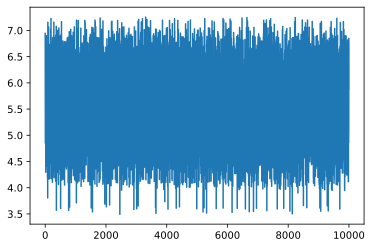

finetuning goes brrr:   6%|▌         | 19999/328000 [1:33:42<23:21:00,  3.66it/s, loss=4.94]

Saving checkpoint here lookingglass_dalle_20000.pt


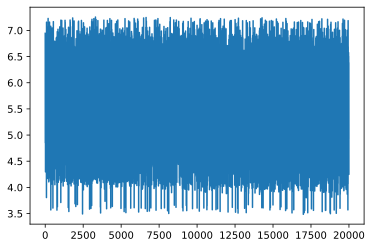

finetuning goes brrr:   9%|▉         | 29999/328000 [2:19:33<22:51:22,  3.62it/s, loss=6.47]

Saving checkpoint here lookingglass_dalle_30000.pt


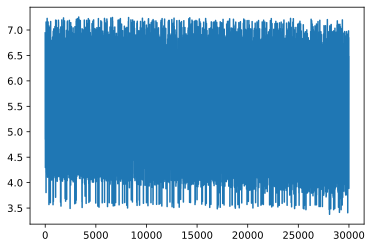

finetuning goes brrr:  12%|█▏        | 39999/328000 [3:05:28<22:08:36,  3.61it/s, loss=5.59]

Saving checkpoint here lookingglass_dalle_40000.pt


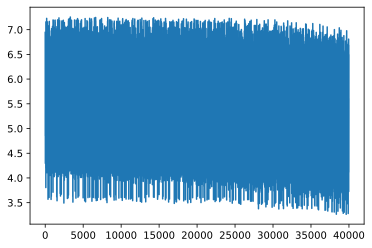

finetuning goes brrr:  15%|█▌        | 49999/328000 [3:51:19<20:46:13,  3.72it/s, loss=3.93]

Saving checkpoint here lookingglass_dalle_50000.pt


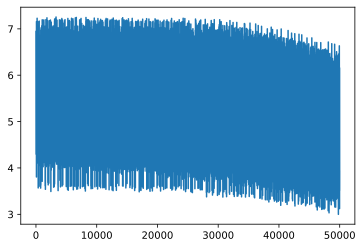

finetuning goes brrr:  18%|█▊        | 59999/328000 [4:37:17<20:38:36,  3.61it/s, loss=4.68]

Saving checkpoint here lookingglass_dalle_60000.pt


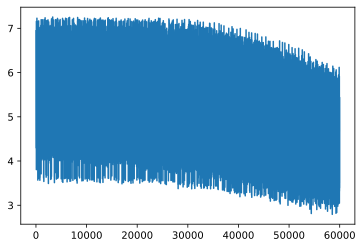

finetuning goes brrr:  21%|██▏       | 69999/328000 [5:23:18<19:40:19,  3.64it/s, loss=4.61]

Saving checkpoint here lookingglass_dalle_70000.pt


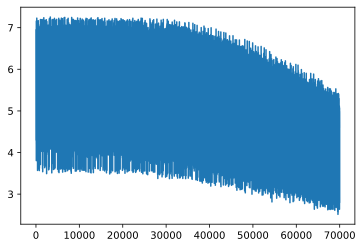

finetuning goes brrr:  24%|██▍       | 79999/328000 [6:09:23<18:41:33,  3.69it/s, loss=3.36]

Saving checkpoint here lookingglass_dalle_80000.pt


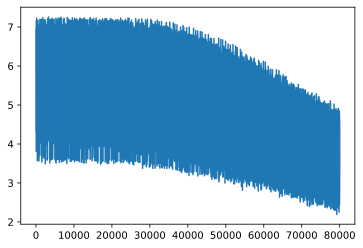

finetuning goes brrr:  27%|██▋       | 89999/328000 [6:55:24<18:12:38,  3.63it/s, loss=3.65]

Saving checkpoint here lookingglass_dalle_90000.pt


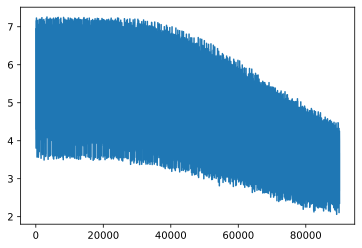

finetuning goes brrr:  30%|███       | 99999/328000 [7:41:22<17:33:38,  3.61it/s, loss=3.38]

Saving checkpoint here lookingglass_dalle_100000.pt


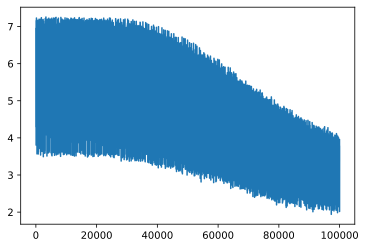

finetuning goes brrr:  34%|███▎      | 109999/328000 [8:27:20<16:57:35,  3.57it/s, loss=2.72]

Saving checkpoint here lookingglass_dalle_110000.pt


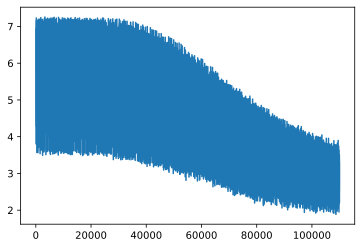

finetuning goes brrr:  34%|███▎      | 110598/328000 [8:30:10<16:35:11,  3.64it/s, loss=2.58]

In [ ]:
#@title Finetuning

def train(model, args: Args, train_dataloader: RuDalleDataset):
    """
    args - arguments for training

    train_dataloader - RuDalleDataset class with text - image pair in batch
    """
    loss_logs = []
    try:
        progress = tqdm(total=(args.epochs * len(input_files)), desc='finetuning goes brrr')
        save_counter = 0
        for epoch in range(args.epochs):
            for text, images in train_dataloader:
                device = model.get_param('device')
                save_counter += 1
                model.zero_grad()
                attention_mask = torch.tril(
                    torch.ones(
                        (args.bs, 1, args.total_seq_length, args.total_seq_length),
                        device=device
                    )
                )
                image_input_ids = vae.get_codebook_indices(images)

                input_ids = torch.cat((text, image_input_ids), dim=1)
                _, loss = forward(
                    model.module, input_ids, attention_mask.half(),
                    return_loss=True, use_cache=False, gradient_checkpointing=6
                )
                loss = loss["image"]
                # train step
                loss.backward()

                torch.nn.utils.clip_grad_norm_(model.parameters(), args.clip)
                optimizer.step()
                scheduler.step()
                optimizer.zero_grad()
                # save every here
                if save_counter % args.save_every == 0:
                    print(f'Saving checkpoint here {args.model_name}_dalle_{save_counter}.pt')

                    plt.plot(loss_logs)
                    plt.show()
                    torch.save(
                        model.state_dict(),
                        os.path.join(args.save_dir, f"{args.model_name}_dalle_{save_counter}.pt")
                    )
                if args.wandb:
                    args.wandb.log({"loss": loss.item()})
                loss_logs += [loss.item()]
                progress.update()
                progress.set_postfix({"loss": loss.item()})

        print(f'Completly tuned and saved here  {args.model_name}__dalle_last.pt')

        plt.plot(loss_logs)
        plt.show()

        torch.save(
            model.state_dict(),
            os.path.join(args.save_dir, f"{args.model_name}_dalle_last.pt")
        )

    except KeyboardInterrupt:
        print(f'What for did you stopped? Please change model_path to /{args.save_dir}/{args.model_name}_dalle_Failed_train.pt')
        plt.plot(loss_logs)
        plt.show()

        torch.save(
            model.state_dict(),
            os.path.join(args.save_dir, f"{args.model_name}_dalle_Failed_train.pt")
        )
    except Exception as err:
        print(f'Failed with {err}')


# Test code from Nev
from functools import reduce
import torch.nn.functional as F
from rudalle.dalle.utils import exists, is_empty
from einops import rearrange

# idk why but this is necessary


class Layer(torch.nn.Module):
    def __init__(self, x, f, *args, **kwargs):
        super(Layer, self).__init__()
        self.x = x
        self.f = f
        self.args = args
        self.kwargs = kwargs

    def forward(self, x):
        return self.f(self.x(x, *self.args, **self.kwargs))


def forward(
        self,
        input_ids,
        attention_mask,
        return_loss=False,
        use_cache=False,
        gradient_checkpointing=False
):
    text = input_ids[:, :self.text_seq_length]
    text_range = torch.arange(self.text_seq_length)
    text_range += (self.vocab_size - self.text_seq_length)
    text_range = text_range.to(self.device)
    text = torch.where(text == 0, text_range, text)
    # some hardcode :)
    text = F.pad(text, (1, 0), value=2)
    text_embeddings = self.text_embeddings(text) + \
        self.text_pos_embeddings(torch.arange(text.shape[1], device=self.device))

    image_input_ids = input_ids[:, self.text_seq_length:]

    if exists(image_input_ids) and not is_empty(image_input_ids):
        image_embeddings = self.image_embeddings(image_input_ids) + \
            self.get_image_pos_embeddings(image_input_ids, past_length=0)
        embeddings = torch.cat((text_embeddings, image_embeddings), dim=1)
    else:
        embeddings = text_embeddings
    # some hardcode :)
    if embeddings.shape[1] > self.total_seq_length:
        embeddings = embeddings[:, :-1]

    alpha = 0.1
    embeddings = embeddings * alpha + embeddings.detach() * (1 - alpha)

    attention_mask = attention_mask[:, :, :embeddings.shape[1], :embeddings.shape[1]]
    t = self.transformer
    layers = []
    layernorms = []
    if not layernorms:
        norm_every = 0
    else:
        norm_every = len(t.layers) // len(layernorms)
    for i in range(len(t.layers)):
        layers.append(Layer(
            t.layers[i],
            lambda x:
                x[0] * layernorms[i // norm_every][0] +
                layernorms[i // norm_every][1] if norm_every and i % norm_every == 0 else x[0],
            torch.mul(attention_mask, t._get_layer_mask(i)[:attention_mask.size(2), :attention_mask.size(3), ]),
            use_cache=False
        ))
    if gradient_checkpointing:  # don't use this under any circumstances
        # actually please do
        # i just spent 3 hours debugging this
        embeddings = torch.utils.checkpoint.checkpoint_sequential(layers, 6, embeddings)
        transformer_output = embeddings
        present_has_cache = False
    else:
        hidden_states = embeddings
        for i in range(len(t.layers)):
            mask = torch.mul(attention_mask, t._get_layer_mask(i)[:attention_mask.size(2), :attention_mask.size(3)])
            hidden_states, present_has_cache = t.layers[i](hidden_states, mask, use_cache=use_cache)
        transformer_output = hidden_states
    transformer_output = self.transformer.final_layernorm(transformer_output)

    logits = self.to_logits(transformer_output)
    if return_loss is False:
        return logits, present_has_cache

    labels = torch.cat((text[:, 1:], image_input_ids), dim=1).contiguous().long()
    logits = rearrange(logits, 'b n c -> b c n')

    text_logits = logits[:, :self.vocab_size, :self.text_seq_length].contiguous().float()
    image_logits = logits[:, self.vocab_size:, self.text_seq_length:].contiguous().float()

    loss_text = F.cross_entropy(
        text_logits,
        labels[:, :self.text_seq_length])
    loss_img = F.cross_entropy(
        image_logits,
        labels[:, self.text_seq_length:])

    loss = (loss_text + self.loss_img_weight * loss_img) / (self.loss_img_weight + 1)
    return loss, {'text': loss_text.data.detach().float(), 'image': loss_img}

# Run training on model
model = freeze(
    model=model,
    freeze_emb=False,
    freeze_ln=False,
    freeze_attn=True,
    freeze_ff=True,
    freeze_other=False
)
#freeze params to 
train(model, torch_args, train_dataloader)


## Generation

In [ ]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import einsum
from einops import rearrange
from taming.modules.diffusionmodules.model import Encoder, Decoder
from rudalle import utils

from functools import partial

def slow_decode(self, img_seq):
    b, n = img_seq.shape
    one_hot_indices = torch.nn.functional.one_hot(img_seq, num_classes=self.num_tokens).float()
    z = (one_hot_indices @ self.model.quantize.embed.weight)
    z = rearrange(z, 'b (h w) c -> b c h w', h=token_height
                  # int(sqrt(n))
                  )
    img = self.model.decode(z)
    img = (img.clamp(-1., 1.) + 1) * 0.5
    return img

if do_resize:
  vae.decode = partial(slow_decode, vae)

#@markdown <b>New image generation function for arbitrary resolution from @nev#4905/[@apeoffire](https://twitter.com/apeoffire)</b>
def slow_generate_images(text, tokenizer, dalle, vae, top_k, top_p, images_num, image_prompts=None, temperature=1.0, bs=8,
                    seed=None, use_cache=True, w=32, h=48, display_intermediate=False, save_state=None):
    if seed is not None:
        utils.seed_everything(seed)
    vocab_size = dalle.get_param('vocab_size')
    text_seq_length = dalle.get_param('text_seq_length')
    image_seq_length = dalle.get_param('image_seq_length')
    total_seq_length = dalle.get_param('total_seq_length')
    device = dalle.get_param('device')
    real = 32

    text = text.lower().strip()
    input_ids = tokenizer.encode_text(text, text_seq_length=text_seq_length)
    pil_images, scores = [], []
    grid = None
    pil_images_ = []
    cache = None
    past_cache = None

    if save_state is not None:
        pil_images, grid, pil_images_, _ = save_state

    if display_intermediate:
        from ipywidgets import Output
        from IPython.display import display, clear_output
        out_area = Output()
        display(out_area)

    try:
        for chunk_i, chunk in enumerate(more_itertools.chunked(range(images_num), bs)):
            chunk_bs = len(chunk)
            pil_images_ = [[] for _ in chunk]
            with torch.no_grad():
                attention_mask = torch.tril(torch.ones((chunk_bs, 1, total_seq_length, total_seq_length), device=device))
                input_ids_ = input_ids.unsqueeze(0).repeat(chunk_bs, 1).to(device)
                grid = torch.zeros((chunk_bs, h, w)).long().cuda()
                if save_state and chunk_i == 0:
                    grid = save_state[1]
                has_cache = False
                sample_scores = []
                for idx in tqdm(range(max(input_ids_.shape[1], save_state[-1] if save_state else 0), total_seq_length-real*real+w*h)):
                    idx -= text_seq_length
                    y = idx // w
                    x = idx % w
                    x_from = max(0, min(w-real, x-real//2))
                    y_from = max(0, y-real//2)
                    xs = []
                    for row in range(y_from, min(h, y)):
                        for col in range(x_from, min(x_from+real, w)):
                            xs.append((row, col))
                    for col in range(x_from, x):
                        xs.append((y, col))
                    outs = []
                    for i in range(len(chunk)):
                        outs_ = []
                        for row, col in xs:
                            outs_.append(grid[i, row, col].item())
                        outs.append(outs_)
                    if cache is not None:
                        cache = list(map(list, cache.values()))
                        for i, e in enumerate(cache):
                            for j, c in enumerate(e):
                                t = cache[i][j]
                                t, c = t[..., :text_seq_length, :], t[..., text_seq_length:, :]
                                cache[i][j] = t
                        cache = dict(zip(range(len(cache)), cache))
                    outs = torch.from_numpy(np.asarray(outs)).long().to(device)
                    ln = input_ids_.shape[1] + outs.shape[1]
                    logits, cache = dalle(torch.cat((input_ids_, outs),
                                                        dim=1), attention_mask[..., -ln-1:, -ln-1:],
                                            cache=cache, use_cache=True, return_loss=False)
                    logits = logits[:, -1, vocab_size:]
                    logits /= temperature
                    filtered_logits = transformers.top_k_top_p_filtering(logits, top_k=top_k, top_p=top_p)
                    probs = torch.nn.functional.softmax(filtered_logits, dim=-1)
                    sample = torch.multinomial(probs, 1)
                    for i, e in enumerate(sample):
                        s = sample[i]
                        grid[i, y, x] = s.item()
                    imgs = vae.decode(grid.view((chunk_bs, -1)))
                    images = utils.torch_tensors_to_pil_list(imgs)
                    for j, e in enumerate(images):
                        pil_images_[j].append(e) 
                    if display_intermediate:
                        with out_area:
                            clear_output()
                            display(utils.torch_tensors_to_pil_list(torch.cat(list(imgs), dim=2).unsqueeze(0))[0])
                            # show(images, 1)  # int(round(sqrt(len(images)))
            pil_images += pil_images_
    # except Exception as e:
    #     print(e)
    #     pass
    except KeyboardInterrupt:
        pil_images += pil_images_
    return pil_images, (pil_images, grid, pil_images_, idx + text_seq_length)


def aspect_crop(image_path, desired_aspect_ratio):
    """
    Return a PIL Image object cropped to desired aspect ratio
    :param str image_path: Path to the image to crop
    :param str desired_aspect_ratio: desired aspect ratio in width:height format
    """

    # compute original aspect ratio
    image = Image.open(image_path)
    width, height = image.size
    original_aspect = float(width) / float(height)

    # convert string aspect ratio into float
    w, h = map(lambda x: float(x), desired_aspect_ratio.split(':'))
    computed_aspect_ratio = w / h
    inverse_aspect_ratio = h / w

    if original_aspect < computed_aspect_ratio:
        # keep original width and change height
        new_height = math.floor(width * inverse_aspect_ratio)
        height_change = math.floor((height - new_height) / 2)
        new_image = image.crop((0, height_change, width, height - height_change))
        return new_image
    elif original_aspect > computed_aspect_ratio:
        # keep original height and change width
        new_width = math.floor(height * computed_aspect_ratio)
        width_change = math.floor((width - new_width) / 2)
        new_image = image.crop((width_change, 0, width - width_change, height))
        return new_image
    elif original_aspect == computed_aspect_ratio:
        return image


# Images

In [ ]:
# -*- coding: utf-8 -*-
import os
from glob import glob
from os.path import join
import torch
import torchvision
import transformers
import more_itertools
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from tqdm.auto import tqdm
from PIL import Image
from einops import rearrange
from rudalle import utils

def generate_images(text, tokenizer, dalle, vae, top_k, top_p, images_num, image_prompts=None, temperature=1.0, bs=8,
                    seed=None, use_cache=True):
    # TODO docstring
    if seed is not None:
        utils.seed_everything(seed)

    vocab_size = dalle.get_param('vocab_size')
    text_seq_length = dalle.get_param('text_seq_length')
    image_seq_length = dalle.get_param('image_seq_length')
    total_seq_length = dalle.get_param('total_seq_length')
    device = dalle.get_param('device')

    text = text.lower().strip()
    input_ids = tokenizer.encode_text(text, text_seq_length=text_seq_length)
    pil_images, ppl_scores = [], []
    for chunk in more_itertools.chunked(range(images_num), bs):
        chunk_bs = len(chunk)
        with torch.no_grad():
            attention_mask = torch.tril(torch.ones((chunk_bs, 1, total_seq_length, total_seq_length), device=device))
            out = input_ids.unsqueeze(0).repeat(chunk_bs, 1).to(device)

            cache = None
            if image_prompts is not None:
                prompts_idx, prompts = image_prompts.image_prompts_idx, image_prompts.image_prompts
                prompts = prompts.repeat(chunk_bs, 1)
            for idx in tqdm(range(out.shape[1], total_seq_length)):
                idx -= text_seq_length
                if image_prompts is not None and idx in prompts_idx:
                    out = torch.cat((out, prompts[:, idx].unsqueeze(1)), dim=-1)
                else:
                    logits, cache = dalle(out, attention_mask, use_cache=use_cache,
                                          cache=cache, return_loss=False)
                    logits = logits[:, -1, vocab_size:]
                    logits /= temperature
                    filtered_logits = transformers.top_k_top_p_filtering(logits, top_k=top_k, top_p=top_p)
                    probs = torch.nn.functional.softmax(filtered_logits, dim=-1)
                    sample = torch.multinomial(probs, 1)
                    out = torch.cat((out, sample), dim=-1)

            codebooks = out[:, -image_seq_length:]
            logits, _ = dalle(out, attention_mask, use_cache=use_cache, return_loss=False)
            logits = rearrange(logits, 'b n c -> b c n')
            image_logits = logits[:, vocab_size:, -image_seq_length:- 1].contiguous().float()
            out = out.contiguous().long()
            ppl_scores.append(
                ce_to_ppl(F.cross_entropy(
                    image_logits,
                    out[:, -image_seq_length + 1:],
                    reduction='none',
                ))
            )

            images = vae.decode(codebooks)
            pil_images += utils.torch_tensors_to_pil_list(images)

    ppl_scores = torch.cat(ppl_scores)
    indexes = ppl_scores.argsort()

    sorted_pil_images = []
    for idx in indexes:
        sorted_pil_images.append(pil_images[idx.item()])

    return sorted_pil_images, ppl_scores[indexes].cpu().numpy().tolist()


def ce_to_ppl(ce):
    indexes = torch.where(ce)
    ce[indexes] = torch.exp(ce[indexes])
    ppl = ce.sum(1) / torch.unique(indexes[0], return_counts=True)[1]
    return ppl


def super_resolution(pil_images, realesrgan, batch_size=4):
    result = []
    for pil_image in pil_images:
        with torch.no_grad():
            sr_image = realesrgan.predict(np.array(pil_image), batch_size=batch_size)
        result.append(sr_image)
    return result


def cherry_pick_by_ruclip(pil_images, text, clip_predictor, count=4):
    """ expected ruclip models """
    with torch.no_grad():
        text_latents = clip_predictor.get_text_latents([text])
        image_latents = clip_predictor.get_image_latents(pil_images)
        logits_per_image = torch.matmul(image_latents, text_latents.t())
        scores = logits_per_image.view(-1)
    top_pil_images = []
    indexes = scores.argsort(descending=True)[:count]
    for idx in indexes:
        top_pil_images.append(pil_images[idx])
    return top_pil_images, scores[indexes].cpu().numpy().tolist()


def show(pil_images, nrow=4, size=14, save_dir=None, show=True):
    """
    :param pil_images: list of images in PIL
    :param nrow: number of rows
    :param size: size of the images
    :param save_dir: dir for separately saving of images, example: save_dir='./pics'
    """
    if save_dir is not None:
        os.makedirs(save_dir, exist_ok=True)
        count = len(glob(join(save_dir, 'img_*.png')))
        for i, pil_image in enumerate(pil_images):
            pil_image.save(join(save_dir, f'img_{count+i}.png'))

    pil_images = [pil_image.convert('RGB') for pil_image in pil_images]
    imgs = torchvision.utils.make_grid(utils.pil_list_to_torch_tensors(pil_images), nrow=nrow)
    if not isinstance(imgs, list):
        imgs = [imgs.cpu()]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False, figsize=(size, size))
    for i, img in enumerate(imgs):
        img = img.detach()
        img = torchvision.transforms.functional.to_pil_image(img)
        if save_dir is not None:
            count = len(glob(join(save_dir, 'group_*.png')))
            img.save(join(save_dir, f'group_{count+i}.png'))
        if show:
            axs[0, i].imshow(np.asarray(img))
            axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
    if show:
        fix.show()
        plt.show()


def classic_convert_emoji_to_rgba(np_image, lower_thr=240, upper_thr=255, width=2):
    import cv2  # noqa
    img = np_image[:, :, :3].copy()
    lower = np.array([lower_thr, lower_thr, lower_thr], dtype='uint8')
    upper = np.array([upper_thr, upper_thr, upper_thr], dtype='uint8')
    mask = cv2.inRange(img, lower, upper)
    ret, thresh = cv2.threshold(mask, 0, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    a_channel = np.ones((512, 512), dtype=np.uint8)*255
    if len(contours) != 0:
        contours = sorted(contours, key=lambda x: x.shape[0])[-7:]
        cv2.fillPoly(a_channel, contours, (0, 0, 0))
        cv2.drawContours(a_channel, contours, -1, (0, 0, 0), width)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2RGBA)
    img[:, :, 3] = a_channel
    return img


def convert_emoji_to_rgba(pil_images, emojich_unet,  device='cpu', bs=1, score_thr=0.99):
    final_images, runs = [], []
    with torch.no_grad():
        for chunk in more_itertools.chunked(pil_images, bs):
            images = []
            for pil_image in chunk:
                image = np.array(pil_image.resize((512, 512)))[:, :, :3]
                image = image.astype(np.float32) / 255.0
                image = torch.from_numpy(image).permute(2, 0, 1)
                images.append(image)
            images = torch.nn.utils.rnn.pad_sequence(images, batch_first=True)
            pred_masks = emojich_unet(images.to(device))
            pred_masks = torch.softmax(pred_masks, 1)
            scores, pred_masks = torch.max(pred_masks, 1)
            pred_masks = pred_masks.int().cpu().numpy()
            pred_masks = (pred_masks * 255).astype(np.uint8)
            for pil_image, pred_mask, score in zip(chunk, pred_masks, scores):
                score = score.mean().item()
                final_image = np.zeros((512, 512, 4), np.uint8)
                final_image[:, :, :3] = np.array(pil_image.resize((512, 512)))[:, :, :3]
                if score > score_thr:
                    run = 'unet'
                    final_image[:, :, -1] = pred_mask
                else:
                    run = 'classic'
                    final_image = classic_convert_emoji_to_rgba(final_image)
                final_image = Image.fromarray(final_image)
                final_images.append(final_image)
                runs.append(run)
    return final_images, runs


def show_rgba(rgba_pil_image):
    img = np.array(rgba_pil_image)
    fig, ax = plt.subplots(1, 3, figsize=(10, 10), dpi=100)
    ax[0].imshow(img[:, :, :3])
    ax[1].imshow(img[:, :, -1])
    mask = np.repeat(np.expand_dims(img[:, :, -1] < 128, -1), 3, axis=-1)
    img = img[:, :, :3]
    img[mask[:, :, 0], 0] = 64
    img[mask[:, :, 0], 1] = 255
    img[mask[:, :, 0], 2] = 64
    ax[2].imshow(img)


In [ ]:
#@markdown # **RUNTIME OPTIONS**
#@markdown These options can be changed in between image generations to alter how the image generates.<br><br>
#@markdown Confidence is how closely the AI will attempt to match the input images. Higher confidence, the more the AI can go "off the rails". This variable is also called "top_p". Think of confidence as the "conceptual similarity" control. Default for prior versions is Low.
confidence = "Medium"  # @param ["Ultra-High", "High", "Medium", "Low", "Ultra-Low"]
generation_p = 0.999

#@markdown Variability affects the potential number of options that the AI can choose from for each "token", or each 8x8 chunk of pixels that it generates. Higher variability, higher amount. This variable is also called "top_k". Think of variability as the "stylistic similarity" control. Default for prior versions is "High".
variability = "High"  # @param ["Ultra-High", "High", "Medium", "Low", "Ultra-Low"]
generation_k = 2148

#@markdown Advanced users can manually set top_p (the parameter that confidence controls) and top_k (the parameter that variability controls). If you don't know what "top_p" or "top_k" mean, leave these at -1, which disables manual input.
top_p = -1 # @param {type:"number"}
top_k = -1 # @param {type:"number"}


if top_p == -1:
  if confidence == "Ultra-High":
      generation_p = 0.9
  elif confidence == "High":
      generation_p = 0.95
  elif confidence == "Medium":
      generation_p = 0.999
  elif confidence == "Low":
      generation_p = 0.9999
  elif confidence == "Ultra-Low":
      generation_p = 0.999999
  else:
      generation_p = 0.999
else:
  generation_p = top_p

if top_k == -1:
  if variability == "Ultra-High":
      generation_k = 8192
  elif variability == "High":
      generation_k = 3072
  elif variability == "Medium":
      generation_k = 2048
  elif variability == "Low":
      generation_k = 1024
  elif variability == "Ultra-Low":
      generation_k = 512
  else:
      generation_k = 8192
else:
  generation_k = top_k

#@markdown If you'd like to prompt the AI with a different text input than what your images are captioned with, you can do so here. Leave blank to use your `input_text`. Text is automatically translated to Russian.
prompt_text = "painting of ibul astronaut" # @param {type:"string"}
prompt_text = DeeplTranslator(api_key='3efbdb01-e303-5c54-6836-df8d7c0a6fec', source='en', target='ru', use_free_api=False).translate(prompt_text) 


#@markdown <br></br>
#@markdown #Collage Options
#@markdown The amount of images to generate per collage and the amount of collages to generate. The generator uses batching in order to make up to four images at once - turn on low_mem mode if it crashes while attempting to make 4, 9, or 25 images. Less images are faster.
image_amount = "4"  # @param [1, 4, 9, 25]
image_amount = int(image_amount)
collage_amount =   1000# @param {type:"number"}

#@markdown If you *really* want to make a 9 or 25 image collage but have a weak CPU, you can try turning on low mem mode. It will take a *while* though.
low_mem = False  # @param {type:"boolean"}

#@markdown By default, Looking Glass includes your original image(s) somewhere in the collage as "Ground Truth". Check this box to disable that behavior.
skip_gt = True  # @param {type:"boolean"}


#@markdown <br><br>
#@markdown #Upscaling
#@markdown Uses RealESRGAN to upscale your images at the end. That's it! Set to x1 to disable. Not recommended to be combined w/ Stretchsizing.
rurealesrgan_multiplier = "x1"  # @param ["x1", "x2", "x4", "x8"]
if rurealesrgan_multiplier != "x1":
    realesrgan = get_realesrgan(rurealesrgan_multiplier, device=device)

#@markdown Uses Swinir to upscale your images at the end. That's it! Incompatible with and overrides RealESRGan. Set to "Disabled" to disable.
swinir_model = "Disabled" #@param ["Disabled", "real_sr x4", "classical_sr x2", "classical_sr x3", "classical_sr x4", "classical_sr x8", "lightweight x2", "lightweight x3", "lightweight x4"]
do_swinir = False
if swinir_model != "Disabled":
  model_type, scale = swinir_model.split(' ')
  scale = int(scale[1])
  # initialize super resolution model
  sr = SwinIR_SR(model_type, scale)
  print(f'Loaded SWINIR {swinir_model} successfully')
  do_swinir = True
  rurealesrgan_multiplier = "x1"

In [ ]:
#@title Your images will emerge here
#@markdown The output will be saved in the session structure under /output/
#@markdown <br>ONCE YOUR CHECKPOINT IS FINE TUNED YOU CAN PRESS THIS BUTTON MULTIPLE TIMES FOR MORE IMAGES. YOU DON'T NEED TO RESTART EACH TIME.
!rm -rf /content/collage*
pil_images = []
scores = []
repeat = 1
rows = 2
insert = 0
amt = 3
if skip_gt:
    amt = 4
if low_mem:
    repeat = 3
    if skip_gt:
        repeat = 4
    amt = 1
if image_amount == 9:
    repeat = 2
    rows = 3
    insert = 4
    amt = 4
    if low_mem:
        repeat = 8
        amt = 1
elif image_amount == 25:
    repeat = 6
    rows = 5
    insert = 12
    amt = 4
    if low_mem:
        repeat = 24
        amt = 1
elif image_amount == 1:
    repeat = 1
    rows = 1
    amt = 1
    skip_gt = True
    insert = 0

def crop_center(pil_img, crop_width, crop_height):
    img_width, img_height = pil_img.size
    return pil_img.crop((
        (img_width - crop_width) // 2,
        (img_height - crop_height) // 2,
        (img_width + crop_width) // 2,
        (img_height + crop_height) // 2
    ))


def crop_max_square(pil_img):
    return crop_center(pil_img, min(pil_img.size), min(pil_img.size))


def generate_images_amt(images_num):
    if do_resize:
        _pil_images, _scores = slow_generate_images(
            prompt_text, tokenizer, model, vae,
            top_k=generation_k, images_num=images_num, top_p=generation_p,
            w=token_width, h=token_height
        )
        for i in range(len(_pil_images)):
          _pil_images[i] = _pil_images[i][-1]
    else:            
      _pil_images, _scores = generate_images(
            prompt_text, tokenizer, model, vae,
            top_k=generation_k, images_num=images_num, top_p=generation_p
        )
    return _pil_images


def save_pil_images(pil_images):
    for k in range(len(pil_images)):
        output_name = f"lg{k + len(onlyfiles)}_{original_folder}.png"
        pil_images[k].save(os.path.join("output", output_name))

for i in range(collage_amount):
    for j in range(repeat):
        pil_images += generate_images_amt(amt)
    if skip_gt and image_amount != 4:
        if image_amount != 1:
            pil_images += generate_images_amt(1)

    if do_stretchsize:
        # ESRGAN Upscaling
        pil_images = super_resolution(pil_images, ss_realesrgan)
        for j in range(len(pil_images)):
            pil_images[j] = pil_images[j].resize((st_width, st_height))

    onlyfiles = next(os.walk('output'))[2]
    file_to_train = random.choice(input_files)
    save_pil_images(pil_images)

    if skip_gt is False:
        if do_resize:
            if do_stretchsize:
                raise NotImplementedError("Stretchsize and resize not simultaneously supported")
            else:
                aspect_ratio = (token_width / token_height)
                with Image.open(file_to_train) as im:
                    # Provide the target width and height of the image
                    to_insert = aspect_crop(im, aspect_ratio).resize((width, height), Image.LANCZOS)
        else:
            if do_stretchsize:
                with Image.open(original_file) as im:
                    # Provide the target width and height of the image
                    to_insert = im.copy()
            else:
                with Image.open(file_to_train) as im:
                    # Provide the target width and height of the image
                    to_insert = crop_max_square(im).resize((256, 256), Image.LANCZOS)
        pil_images.insert(insert, to_insert.convert('RGB'))

    if do_swinir:
      for imagenum in range(len(pil_images)):
        swinir_temp = numpy.array(pil_images[imagenum])
        upsize_temp = sr.upscale(swinir_temp)
        pil_images[imagenum] = Image.fromarray(upsize_temp)
      save_pil_images(pil_images)
    if rurealesrgan_multiplier != "x1":
        pil_images = super_resolution(pil_images, realesrgan)
        save_pil_images(pil_images)

    save_collage = True
    if save_collage and image_amount != 1:
      img_width, img_height = pil_images[0].size
      collage_width = img_width * rows
      collage_height = img_height * rows
      collage = Image.new("RGBA", (collage_width,collage_height), color=(255,255,255,255))
      c=0
      for i in range(0,collage_width,img_width):
          for j in range(0,collage_height,img_height):           
              collage.paste(pil_images[c], (i,j))
              c+=1
      current_time = datetime.now().strftime('%y%m%d-%H%M%S_%f')
      if do_stretchsize:
        collage = collage.resize((int(collage_width/4), int(collage_height/4)))
      else:
        collage = collage.resize((int(collage_width), int(collage_height)))
      collage.save(f'collage-{current_time}.png')
    show(pil_images, rows)

    pil_images = []
    scores = []

gc.collect()

In [ ]:
gc.collect()